# Lab 4 - Correlation & Regression

---

**Course:** MATH 2310  
**Author:** Jakob Balkovec  
**Instructor:** G. Egan  
**Date:** Tue, Apr 2nd 2024  

---

In [68]:
"""_summary_
Course: MATH 2310
Author: Jakob Balkovec
Instructor: G. Egan

File: lab4.ipynb

Brief: Correlation & Regression

Env: Python 3.11.2 64-bit
"""
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from typing import Union

import warnings

# Predicting taste
warnings.filterwarnings("ignore")

print("Currently in: ", __name__)

Currently in:  __main__


### Utility functions

In [69]:
# Read/Load the data
paths = {
    'cheese': '/Users/jbalkovec/Desktop/MATH2310/Labs/Lab4/Data/cheese.xls',
    'ropes': '/Users/jbalkovec/Desktop/MATH2310/Labs/Lab4/Data/ropes.txt'
}

In [70]:
def read_excel(file_path: str) -> Union[pd.DataFrame, None]:
    """ Read data from an Excel file """
    try:
        data = pd.read_excel(file_path)
        return data
    except Exception as e:
        print(f"Error reading Excel file at {file_path}: {e}")
        return None

In [71]:
def read_text(file_path: str, delimiter: str = ' ') -> Union[pd.DataFrame, None]:
    """ Read data from a text file """
    try:
        data = pd.read_csv(file_path, sep=delimiter, header=None)
        data = data.rename(columns={0: 'load', 1: 'time'})
        return data
    except Exception as e:
        print(f"Error reading text file at {file_path}: {e}")
        return None

In [72]:
def plot_scatter(ax, predictor, response, scatter_color):
    """
    Plot a scatterplot between a predictor variable and a response variable,
    and calculate the correlation coefficient.
    """
    predictor_name = predictor.name.capitalize()
    response_name = response.name.capitalize()
    
    sns.scatterplot(x=predictor, y=response, ax=ax, color=scatter_color)
    ax.set_xlabel(predictor_name)
    ax.set_ylabel(response_name)
    ax.set_title(f'{predictor_name} vs {response_name}')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    corr = predictor.corr(response)
    ax.text(0.5, 
        0.95, 
        r"$\bf{Correlation:}$" + f" {corr:.2f}", 
        horizontalalignment='center', 
        verticalalignment='top', 
        transform=ax.transAxes)

    return corr

## Activity One

Examine the relationships between each of the three predictor variables and the response variable.  
 
**Skill Objective**: Using Python, construct three `scatterplots` showing the relationship between the response variable and each of the three predictor variables. For each scatterplot, also find the corresponding correlation value, r. 

[_name_]: acetic >> [_value_]: 0.55
[_name_]: h2s    >> [_value_]: 0.756
[_name_]: lactic >> [_value_]: 0.704


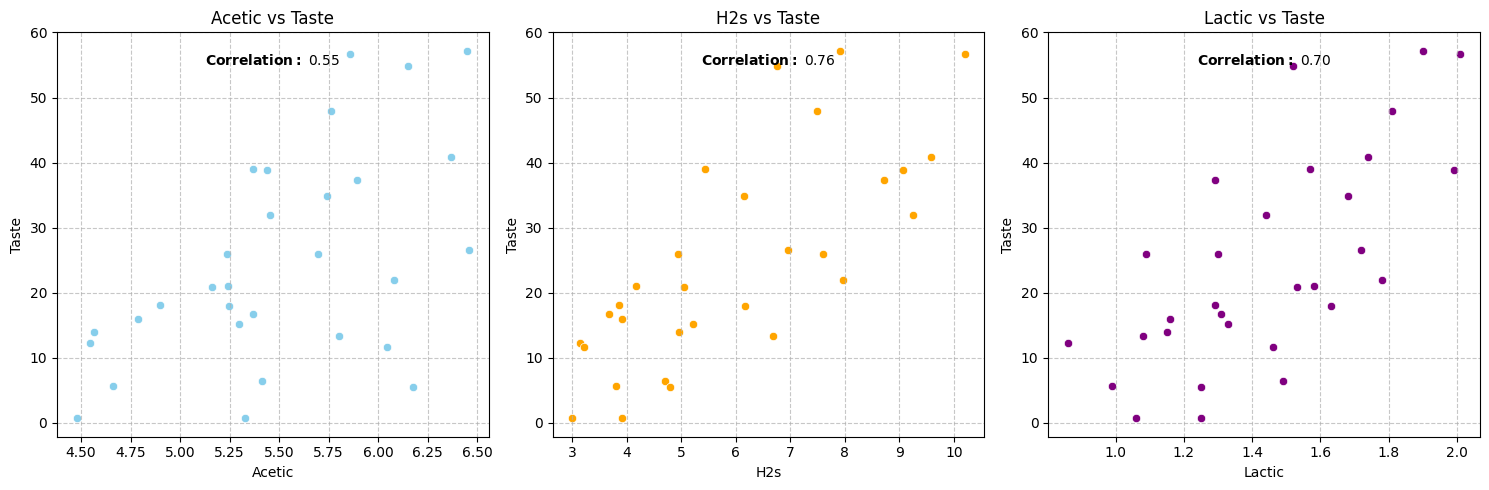

In [73]:
cheese_df = read_excel(paths['cheese'])

# print(cheese_df.head())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

response = cheese_df['taste']

predictor = {
  'acetic' : cheese_df['Acetic'],
  'h2s'    : cheese_df['H2S'],
  'lactic' : cheese_df['Lactic']
}

corr_acetic = plot_scatter(axs[0], predictor['acetic'], response, 'skyblue')
corr_h2s = plot_scatter(axs[1], predictor['h2s'], response, 'orange')
corr_lactic = plot_scatter(axs[2], predictor['lactic'], response, 'purple')

corr = {
  'acetic': corr_acetic,
  'h2s   ': corr_h2s,
  'lactic': corr_lactic
}

for item in corr:
  print(f"[_name_]: {item} >> [_value_]: {round(corr[item], 3)}")

plt.tight_layout()
plt.show()


---
| Plot | R-value |
|----------|-------|
| Acetic   | 0.55  |
| H2S      | 0.756 |
| Lactic   | 0.704 |
---

**Analysis Objective**: Based on your `scatterplots`, comment briefly on whether there appears to be a relationship between each of the predictor variables and the response variable, and whether those relationships appear to be positive or negative. Which of the three predictor variables has the strongest relationship with the response variable?

**Answer**: 
  - Acetic Acid      (`r = 0.55`): There seems to be a moderate *positive* relationship between acetic acid concentration and the response variable 
  - Hydrogen Sulfide (`r = 0.756`): There appears to be a strong *positive* relationship between hydrogen sulfide concentration and the response variable
  - Lactic Acid      (`r = 0.704`): There also seems to be a strong *positive* relationship between lactic acid concentration and the response variable 

Based solely on these correlation coefficients, and the scatter plots, we can conclude that `H2S` is the strongest predictor of the response variable among the three predictor variables provided (`r = 0.756`). 

## Activity Two

Now we will look at how we could use information about hydrogen sulfide levels to predict taste ratings.  
 
**Skill Objective**: Find the equation of the regression line predicting taste score based on hydrogen sulfide level. 

In [74]:
model = LinearRegression()

# Get the slope and intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(predictor['h2s'], response)

print(f"[LINE EQN]: Taste = {slope:.2f} * H2S + ({intercept:.2f})")

[LINE EQN]: Taste = 5.78 * H2S + (-9.79)


**Analysis Objective**: What taste score would you predict for a cheese whose hydrogen sulfide measurement was `5.0`?

**Answer**: 
I found the equation of the line to be: 
  > $$ \text{Taste} = 5.78 \times \text{H}_2\text{S} - 9.79 $$

Taste score prediction for a cheese whose hydrogen sulfide measurement is `5.0`:
$$\begin{align*}
\text{Taste} &= 5.78 \times 5.0 - 9.79 \\
&= 28.9 - 9.79 \\
&= 19.11
\end{align*}$$


  

In [75]:
# Or we can predict the taste score using Python
h2s_measurement = 5.0 

# Remove
pred = predictor['h2s'].to_frame()
model.fit(pred, response) 

predicted_taste = model.predict([[h2s_measurement]])  

print("Taste:", round(predicted_taste[0], ndigits=2))

Taste: 19.09


Taste score prediction for a cheese whose hydrogen sulfide measurement is `5.0` using Python
>
> $$\text{Taste} = 19.09$$
>

## Activity Three

Now we will assess the quality of this regression model 
 
**Skill Objective**: Using Python, find the value of the coefficient of determination, $R^2$, for the regression model predicting taste rating based on hydrogen sulfide levels. 

In [76]:
predicted_taste = model.predict(predictor['h2s'].to_frame())
r_squared = r2_score(response, predicted_taste)
print("Coefficient of determination (R^2):", round(r_squared, ndigits=3))

Coefficient of determination (R^2): 0.571


**Analysis Objective**: In one sentence, explain what this $R^2$ value tells you about the quality of the regression model.

**Answer**: 
>$$R^2 = 0.571$$

It gives us an idea of how much of the difference in taste scores can be understood by our regression model. Basically, it tells us how well our model fits our data. 

  - If the value is close to `1`, it means our model does a great job of explaining the differences in taste scores, which suggests that our model fits the data really well. 
  - On the other hand, if the value is closer to `0`, it means our model doesn't do a good job of explaining those differences, indicating that our model doesn't fit the data very well.

## Activity 4 

Occasionally in lab we will look at ideas that expand somewhat beyond what is covered in our book. This activity is one such time. In class, and in our book, we have seen how to construct a regression equation using one variable to predict another. But the same basic idea can be used to construct a regression equation using multiple variables to predict a variable. So, for example, we might have an equation of the form 

> $$ Y = a + bX + cW + dZ $$

where $X$, $W$, and $Z$ are all variables we want to use to make our prediction.  
 
While we will not be learning the mathematics to estimate such an equation by hand, it is quite simple to estimate an equation like this using R or other statistical software. 
 
**Skill Objective**: Using Python, Estimate the equation of the regression line predicting taste score based on all three predictor variables in a single equation. 

In [77]:
# Construct a single pd.DataFrame with all the predictors
predictors_df = pd.concat([predictor['acetic'], predictor['h2s'], predictor['lactic']], axis=1)

model.fit(predictors_df, response)

# Get the slope and intercept
slope = model.coef_
intercept = model.intercept_

print(f"[LINE EQN]: Taste = {intercept:.2f} + {slope[0]:.2f} * Acetic + {slope[1]:.2f} * H2S + {slope[2]:.2f} * Lactic")

[LINE EQN]: Taste = -28.88 + 0.33 * Acetic + 3.91 * H2S + 19.67 * Lactic


**Analysis Objective**: Based on your regression equation, what taste score would you predict for a cheese whose hydrogen sulfide measurement was `5.0`, whose acetic acid measurement was `6.1`, and whose lactic acid measurement was `0.90`?

**Answer**: 
  Using `model.fit()`, I found the equation of the line to be: 
  > $$ \text{Taste} = -28.88 + 0.33 \times \text{Acetic} + 3.91 \times \text{H}_2\text{S} + 19.67 \times \text{Lactic}$$ 

Taste score prediction for a cheese whose hydrogen sulfide measurement is `5.0`, whose acetic acid measurement was `6.1`, and whose lactic acid measurement was `0.90`:

$$\begin{align*}
\text{Taste} & = -28.88 + (0.33 \times 6.1) + (3.91 \times 5.0) + (19.67 \times 0.90) \\
& = -28.88 + 2.013 + 19.55 + 17.703 \\
& = -7.317 + 17.703 \\
& = 10.386
\end{align*}$$

In [78]:
# Or we can predict the taste score using Python
h2s_measurement = 5.0  
acetic_acid_measurement = 6.1
lactic_acid_measurement = 0.9

predicted_taste = model.predict([[acetic_acid_measurement, h2s_measurement, lactic_acid_measurement]])

print("Taste:", round(predicted_taste[0], ndigits=2))

Taste: 10.39


Taste score prediction for a cheese whose hydrogen sulfide measurement is `5.0`, whose acetic acid measurement was `6.1`, and whose lactic acid measurement was `0.90` using Python
>
> $$\text{Taste} = 10.39$$
>

**Analysis Objective**: Based on the output from Python, what proportion of the variability in taste scores can be explained by this model using all three predictor variables? 

In [79]:
predicted_taste = model.predict(predictors_df)
r_squared = r2_score(response, predicted_taste)

print("Coefficient of determination (R^2):", round(r_squared, ndigits=3))

Coefficient of determination (R^2): 0.652


Our math yields the following:
> $$ R^2 = 0.652 $$
This means that approximately 65.2% of the variability in taste scores can be explained by this model using all three predictor variables

## Activity 5 
 
Polyester fiber ropes are increasingly being used as components of mooring lines for offshore structures in deep water. The authors of the paper “Quantifying the Residual Creep Life of Polyester Mooring Ropes” (Intl. J. of Offshore and Polar Explor., 2005: 223-228) used the data contained in the file `ropes.txt` as a basis for studying how time to failure (hr) depended on load (% of breaking load).  
 
In the data file, the first column is load (as a percentage out of 100), and the second 
column is the time to failure.  

### Part [A] 

We will examine the relationship between the two variables. 
 
**Skill Objective**: Construct a scatterplot of x = load versus y = time. 

[_name_]: corr_rope >> [_value_]: -0.422


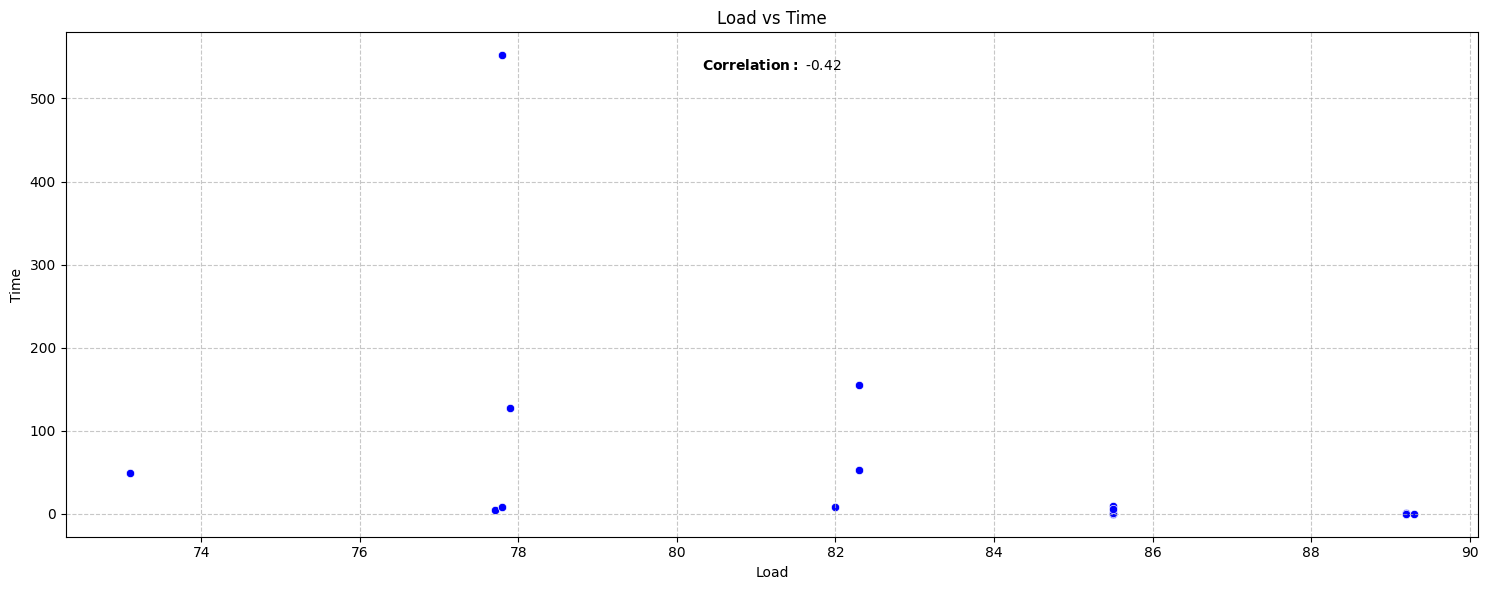

In [80]:
ropes_df = read_text(paths['ropes'])

# print(ropes_df.head())

fig, axs = plt.subplots(1, 1, figsize=(15, 6))

predictor = ropes_df['load']
response = ropes_df['time']

corr_ropes = plot_scatter(axs, predictor, response, 'blue')

print(f"[_name_]: corr_rope >> [_value_]: {round(corr_ropes, 3)}")

plt.tight_layout()
plt.show()

**Analysis Objective**: Would it be reasonable to characterize the relationship between the two variables to be linear? 

**Answer**: No. The scatter doesn't look like a straight line. The correlation coefficient between time to failure and load is `-0.422`. This negative correlation suggests that there *may or may not* be a weak negative linear relationship between the two variables.

### Part [B]

We will try to address the nonlinearity through a transformation.  
 
**Skill Objective**: Transform the response variable by computing `y’ = log(y)`. Construct a scatterplot of `x` and `y’`. 

[_name_]: corr_rope_transformed >> [_value_]: -0.76


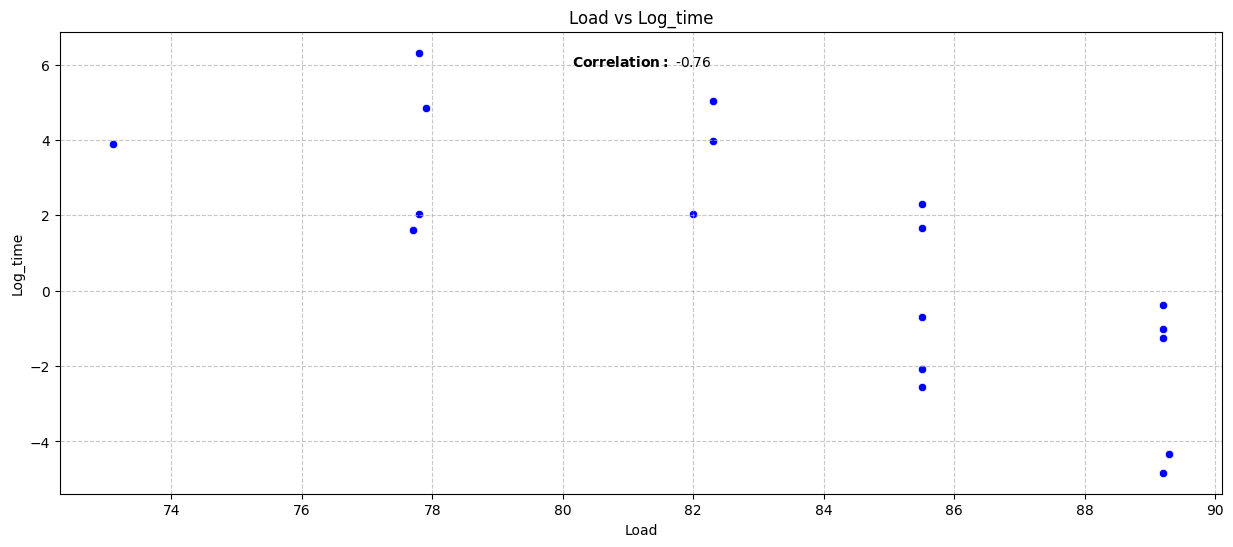

In [81]:
ropes_df['log_time'] = np.log(ropes_df['time'])
log_response = ropes_df['log_time']

fig, axs = plt.subplots(1, 1, figsize=(15, 6))

log_corr_ropes = plot_scatter(axs, predictor, log_response, 'blue')

print(f"[_name_]: corr_rope_transformed >> [_value_]: {round(log_corr_ropes, 3)}")

**Analysis Objective**: Would it be reasonable to characterize the relationship between these two variables to be linear? 

**Answer**: 

Based on the provided correlation coefficient of `-0.76` between load and log transformed time, it suggests a somewhat strong negative linear relationship between the two variables.

Therefore, it **would be reasonable** to characterize the relationship between these two variables as **linear**.

### Part [C]

Finally, we will fit a regression model.  
 
**Skill Objective**: Fit a straight line to the (x, y’) data. 

[LINE EQN]: y' = -0.49 * x + 42.15


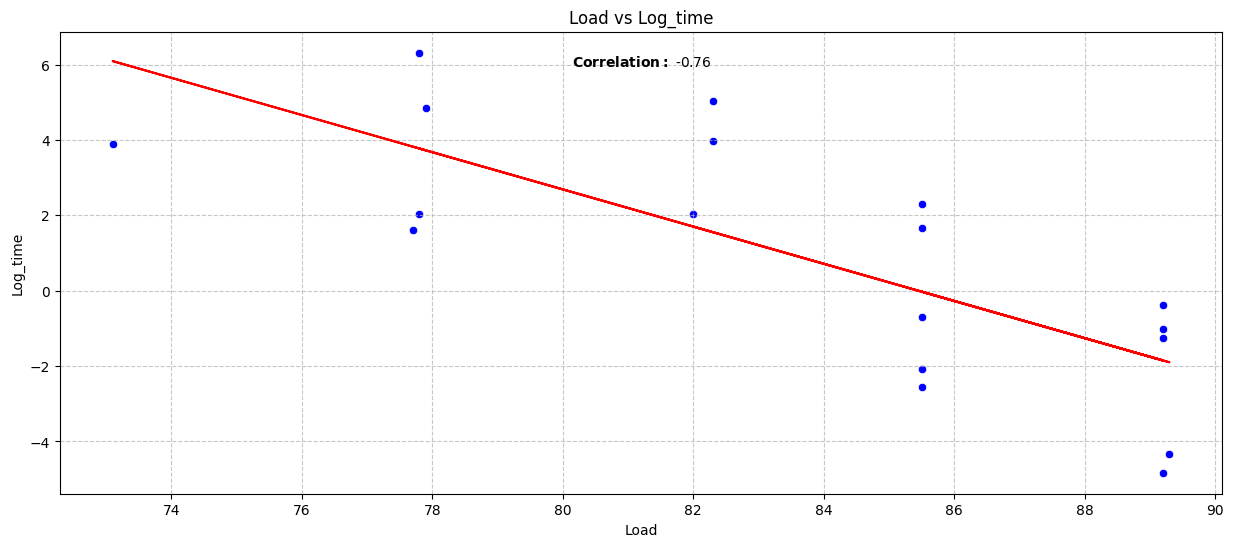

In [82]:
load = ropes_df[['load']]  
log_time = ropes_df['log_time']

slope, intercept, r_value, p_value, std_err = stats.linregress(load.squeeze(), log_time)

print(f"[LINE EQN]: y' = {slope:.2f} * x + {intercept:.2f}")

fig, axs = plt.subplots(1, 1, figsize=(15, 6))
log_corr_ropes = plot_scatter(axs, predictor, log_response, 'blue')

plt.plot(load, (slope * load + intercept), color='red', label='Fitted Line')
plt.show()


**Analysis Objective**: Based on the linear fit, predict the value of failure time from a load of 85%.

**Answer**: 
$$\begin{align*}
\text{Time} & = -0.49 \times \text{Load} + 42.15 \\
& = -0.4165 + 42.15 \\
& = 41.689
\end{align*}$$

In [83]:
# Or we can predict the taste score using Python
ropes_model = LinearRegression()
ropes_model.fit(load, log_time)

load = 0.85
predicted_time = ropes_model.predict([[load]])

raw_rounded_time = round(predicted_time[0], ndigits=2)
print("[Raw Time]:", raw_rounded_time)

hours = int(raw_rounded_time)
minutes_decimal = (raw_rounded_time - hours) * 60

minutes = int(minutes_decimal)

print("    [Time]:", hours, "hours and", minutes, "minutes")

[Raw Time]: 41.73
    [Time]: 41 hours and 43 minutes


Based on the linear fit, the value of failure time from a load of `85%` is `41.73` hours. Which adds to approximately `41` hours and `43` minutes.

---
Jakob Balkovec